In [1]:
%matplotlib inline
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

### code for fitting a regression model

In [3]:
# reduce data frame to the loop top 1000 and select columns for regression analysis
car_df = pd.read_csv('ToyotaCorolla.csv')
car_df = car_df.iloc[0:1000]
car_df.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0


In [5]:
# code for fitting a regression model
# reduce data frame to the loop top 1000 and select columns for regression analysis
car_df = pd.read_csv("ToyotaCorolla.csv")
car_df = car_df.iloc[0:1000]
car_df.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0


In [6]:
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic','CC','Doors', 'Quarterly_Tax', 'Weight']
outcome = 'Price'

In [7]:
# partition data
x = pd.get_dummies(car_df[predictors], drop_first = True) # Fuel_Type 더미 생성 (2개)
y = car_df[outcome]
x.head()

,Age_08_04,KM,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,1,0,2000,3,210,1165,1,0
1,23,72937,90,1,0,2000,3,210,1165,1,0
2,24,41711,90,1,0,2000,3,210,1165,1,0
3,26,48000,90,0,0,2000,3,210,1165,1,0
4,30,38500,90,0,0,2000,3,210,1170,1,0


In [ ]:
# partition data
x = pd.get_dummies(car_df[predictors], drop_first = True) # Fuel_Type 더미 생성
y = car_df[outcome]
x.head()

In [9]:
train_x, valid_x, train_y, valid_y = train_test_split(x,y, test_size=0.4, random_state=1)

In [10]:
train_x, valid_x, train_y, valid_y = train_test_split(x,y,test_size=0.4,random_state=1)

In [11]:
car_lm = LinearRegression() #회귀분석 모델
car_lm.fit(train_x, train_y) #학습데이터를 fit

LinearRegression()

In [12]:
car_lm = LinearRegression()
car_lm.fit(train_x, train_y)

LinearRegression()

In [7]:
# print coefficients(=각 예측변수의 계수=베타값)
print(pd.DataFrame({'Predictors':x.columns, 'coeffient':car_lm.coef_}))

          Predictors    coeffient
0          Age_08_04  -140.748761
1                 KM    -0.017840
2                 HP    36.103419
3          Met_Color    84.281830
4          Automatic   416.781954
5                 CC     0.017737
6              Doors   -50.657863
7      Quarterly_Tax    13.625325
8             Weight    13.038711
9   Fuel_Type_Diesel  1066.464681
10  Fuel_Type_Petrol  2310.249543


In [13]:
# print coefficients (=각 예측변수의 계수=베타값)
print(pd.DataFrame({'Predictors':x.columns, 'coefficient':car_lm.coef_}))

          Predictors  coefficient
0          Age_08_04  -140.748761
1                 KM    -0.017840
2                 HP    36.103419
3          Met_Color    84.281830
4          Automatic   416.781954
5                 CC     0.017737
6              Doors   -50.657863
7      Quarterly_Tax    13.625325
8             Weight    13.038711
9   Fuel_Type_Diesel  1066.464681
10  Fuel_Type_Petrol  2310.249543


In [8]:
# print performance measure (training data) = 예측 성능측도 요약 
regressionSummary(train_y, car_lm.predict(train_x))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1400.5823
            Mean Absolute Error (MAE) : 1046.9072
          Mean Percentage Error (MPE) : -1.0223
Mean Absolute Percentage Error (MAPE) : 9.2994


In [14]:
# print performance measure (training data) = 예측 성능측도 요약
regressionSummary(train_y, car_lm.predict(train_x))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1400.5823
            Mean Absolute Error (MAE) : 1046.9072
          Mean Percentage Error (MPE) : -1.0223
Mean Absolute Percentage Error (MAPE) : 9.2994


### code for fitting a regression model to training set and predicting prices in validation set

In [9]:
# Use predict() to make predictions on a new set
car_lm_pred = car_lm.predict(valid_x) # train_x를 fit시킨 모델에 새로운 set인 valid_x을 넣어 예측
result = pd.DataFrame({'Predicted':car_lm_pred, 'Actual':valid_y, 'Residual':valid_y - car_lm_pred})
print(result.head(20))

        Predicted  Actual     Residual
507  10607.333940   11500   892.666060
818   9272.705792    8950  -322.705792
452  10617.947808   11450   832.052192
368  13600.396275   11450 -2150.396275
242  12396.694660   11950  -446.694660
929   9496.498212    9995   498.501788
262  12480.063217   13500  1019.936783
810   8834.146068    7950  -884.146068
318  12183.361282    9900 -2283.361282
49   19206.965683   21950  2743.034317
446  10987.498309   11950   962.501691
142  18501.527375   19950  1448.472625
968   9914.690947    9950    35.309053
345  13827.299932   14950  1122.700068
971   7966.732543   10495  2528.267457
133  17185.242041   15950 -1235.242041
104  19952.658062   19450  -502.658062
6    16570.609280   16900   329.390720
600  13739.409113   11250 -2489.409113
496  11267.513740   11750   482.486260


In [15]:
# code for fitting a regression model to training set and prediction prices in validation set
# Use predict() to make predictions on a new set
car_lm_pred = car_lm.predict(valid_x)
result = pd.DataFrame({'Predicted':car_lm_pred, 'Actual':valid_y, 'Residual':valid_y - car_lm_pred})
print(result.head(20))

        Predicted  Actual     Residual
507  10607.333940   11500   892.666060
818   9272.705792    8950  -322.705792
452  10617.947808   11450   832.052192
368  13600.396275   11450 -2150.396275
242  12396.694660   11950  -446.694660
929   9496.498212    9995   498.501788
262  12480.063217   13500  1019.936783
810   8834.146068    7950  -884.146068
318  12183.361282    9900 -2283.361282
49   19206.965683   21950  2743.034317
446  10987.498309   11950   962.501691
142  18501.527375   19950  1448.472625
968   9914.690947    9950    35.309053
345  13827.299932   14950  1122.700068
971   7966.732543   10495  2528.267457
133  17185.242041   15950 -1235.242041
104  19952.658062   19450  -502.658062
6    16570.609280   16900   329.390720
600  13739.409113   11250 -2489.409113
496  11267.513740   11750   482.486260


In [10]:
# print performance measure (validation data)
regressionSummary(valid_y, car_lm_pred)


Regression statistics

                      Mean Error (ME) : 103.6803
       Root Mean Squared Error (RMSE) : 1312.8523
            Mean Absolute Error (MAE) : 1017.5972
          Mean Percentage Error (MPE) : -0.2633
Mean Absolute Percentage Error (MAPE) : 9.0111


In [16]:
# print performance measure (validation data)
regressionSummary(valid_y, car_lm_pred)


Regression statistics

                      Mean Error (ME) : 103.6803
       Root Mean Squared Error (RMSE) : 1312.8523
            Mean Absolute Error (MAE) : 1017.5972
          Mean Percentage Error (MPE) : -0.2633
Mean Absolute Percentage Error (MAPE) : 9.0111


### code for plotting histogram of validation errors

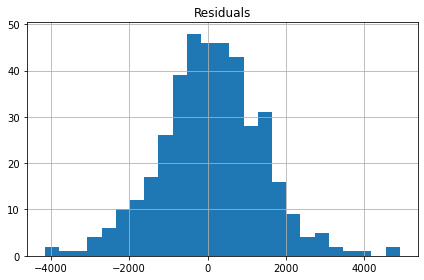

0.7425


In [11]:
car_lm_pred = car_lm.predict(valid_x)
all_residuals = valid_y - car_lm_pred

pd.DataFrame({'Residuals' : all_residuals}).hist(bins=25)
plt.tight_layout()
plt.show()

# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx 75% 
# : [-1406, 1406]에 있는 잔차가 전체에서 75%정도를 차지한다
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

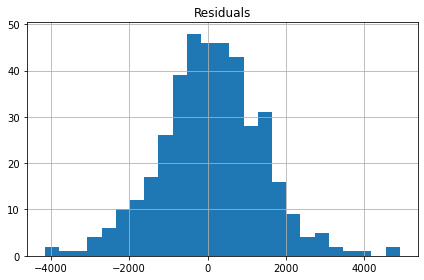

In [17]:
car_lm_pred = car_lm.predict(valid_x)
all_residuals = valid_y - car_lm_pred
pd.DataFrame({'Residuals':all_residuals}).hist(bins=25)
plt.tight_layout()
plt.show() # 잔차가 정규분포를 따름 (최소제곱법의 가정?)

### code for exhaustive search We make use of the utility function exhaustive_search(); the source code of this function is included in the appendix. The function takes three arguments: a list of all features, a function that creates a model for a given set of features, and a function that scores the model

### 전역탐색을 위한 코드 / exhuastive_search()의 활용. 세 가지 argument(매개변수) 가짐 : 모든 features의 리스트, 그 features의 set에 기반한 모델을 만드는 함수, 그 모델을 평가하는 함수

In [19]:
# 1. 모든 features의 list 준비

# 2. 그 features에 기반한 모델을 만드는 함수
def train_model(variables): 
    model = LinearRegression()
    model.fit(train_x[list(variables)], train_y)
    return model

# 3. 그 모델을 평가하는(점수 메기는) 함수(score 함수)
def score_model(model, variables):
    pred_y = model.predict(train_x[list(variables)])
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_x.columns
results = exhaustive_search(allVariables, train_model, score_model) # 전역탐색 실시

# n=4일때까지 score가 늘다가 이후로는 딱히 기여도가 유의미하지 않음. n=4 선택

In [20]:
results

[{'n': 1,
  'variables': ['Age_08_04'],
  'score': -0.7679012055663247,
  'model': LinearRegression()},
 {'n': 2,
  'variables': ['Age_08_04', 'HP'],
  'score': -0.801159894775247,
  'model': LinearRegression()},
 {'n': 3,
  'variables': ['Age_08_04', 'HP', 'Weight'],
  'score': -0.8296593751851306,
  'model': LinearRegression()},
 {'n': 4,
  'variables': ['Age_08_04', 'KM', 'HP', 'Weight'],
  'score': -0.8463572130654309,
  'model': LinearRegression()},
 {'n': 5,
  'variables': ['Age_08_04', 'KM', 'HP', 'Quarterly_Tax', 'Weight'],
  'score': -0.8490443945677377,
  'model': LinearRegression()},
 {'n': 6,
  'variables': ['Age_08_04',
   'KM',
   'HP',
   'Quarterly_Tax',
   'Weight',
   'Fuel_Type_Petrol'],
  'score': -0.8531723015240328,
  'model': LinearRegression()},
 {'n': 7,
  'variables': ['Age_08_04',
   'KM',
   'HP',
   'Quarterly_Tax',
   'Weight',
   'Fuel_Type_Diesel',
   'Fuel_Type_Petrol'],
  'score': -0.8538596994982728,
  'model': LinearRegression()},
 {'n': 8,
  'variab

In [14]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_x[list(variables)], train_y)
    return model
def score_model(model, variables):
    pred_y = model.predict(train_x[list(variables)])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model) # R2adj 값 그거 ㅇㅇ 
allVariables = train_x.columns
results = exhaustive_search(allVariables, train_model, score_model)
results # 예측변수가 1개일 때 2개일 때 등의 순으로 최적 모델을 제시함 (최고의 부분집합 찾음)

[{'n': 1,
  'variables': ['Age_08_04'],
  'score': -0.7679012055663247,
  'model': LinearRegression()},
 {'n': 2,
  'variables': ['Age_08_04', 'HP'],
  'score': -0.801159894775247,
  'model': LinearRegression()},
 {'n': 3,
  'variables': ['Age_08_04', 'HP', 'Weight'],
  'score': -0.8296593751851306,
  'model': LinearRegression()},
 {'n': 4,
  'variables': ['Age_08_04', 'KM', 'HP', 'Weight'],
  'score': -0.8463572130654309,
  'model': LinearRegression()},
 {'n': 5,
  'variables': ['Age_08_04', 'KM', 'HP', 'Quarterly_Tax', 'Weight'],
  'score': -0.8490443945677377,
  'model': LinearRegression()},
 {'n': 6,
  'variables': ['Age_08_04',
   'KM',
   'HP',
   'Quarterly_Tax',
   'Weight',
   'Fuel_Type_Petrol'],
  'score': -0.8531723015240328,
  'model': LinearRegression()},
 {'n': 7,
  'variables': ['Age_08_04',
   'KM',
   'HP',
   'Quarterly_Tax',
   'Weight',
   'Fuel_Type_Diesel',
   'Fuel_Type_Petrol'],
  'score': -0.8538596994982728,
  'model': LinearRegression()},
 {'n': 8,
  'variab

In [24]:
# 전역탐색법 평가지표 (모든 고려가능한 부분집합에 따른 r2adj, AIC 값 / r2adj : the higher, the better / AIC : the lower, the better)

data = []
for result in results: # results의 각 dictionary 마다 반복
    model = result['model']
    variables = list(result['variables'])
    AIC = AIC_score(train_y, model.predict(train_x[variables]), model) 
    
    d = {'n':result['n'], 'r2adj':-result['score'], 'AIC':AIC} 
    d.update({var : var in result['variables'] for var in allVariables}) # <-- 이 코드 어케 돌아가는 거냐???? 뚕.. 
    # 암튼 분산 추가
    data.append(d)
pd.DataFrame(data, columns=('n','r2adj','AIC') + tuple(sorted(allVariables))) # tuple 앞에 저거 '+'의 용도??? 뚕..

,n,r2adj,AIC,Age_08_04,Automatic,CC,Doors,Fuel_Type_Diesel,Fuel_Type_Petrol,HP,KM,Met_Color,Quarterly_Tax,Weight
0,1,0.767901,10689.712094,True,False,False,False,False,False,False,False,False,False,False
1,2,0.801160,10597.910645,True,False,False,False,False,False,True,False,False,False,False
2,3,0.829659,10506.084235,True,False,False,False,False,False,True,False,False,False,True
3,4,0.846357,10445.174820,True,False,False,False,False,False,True,True,False,False,True
4,5,0.849044,10435.578836,True,False,False,False,False,False,True,True,False,True,True
5,6,0.853172,10419.932278,True,False,False,False,False,True,True,True,False,True,True
6,7,0.853860,10418.104025,True,False,False,False,True,True,True,True,False,True,True
7,8,0.854297,10417.290103,True,True,False,False,True,True,True,True,False,True,True
8,9,0.854172,10418.789079,True,True,False,True,True,True,True,True,False,True,True
9,10,0.854036,10420.330800,True,True,False,True,True,True,True,True,True,True,True


In [15]:
data = []
for result in results:
    model = result['model']
    variables = list(result['variables'])
    AIC = AIC_score(train_y, model.predict(train_x[variables]), model)
    
    d = {'n':result['n'], 'r2adj':-result['score'],'AIC':AIC}
    d.update({var : var in result['variables'] for var in allVariables})
    data.append(d)
pd.DataFrame(data, columns=('n','r2adg','AIC') + tuple(sorted(allVariables)))

,n,r2adg,AIC,Age_08_04,Automatic,CC,Doors,Fuel_Type_Diesel,Fuel_Type_Petrol,HP,KM,Met_Color,Quarterly_Tax,Weight
0,1,NaN,10689.712094,True,False,False,False,False,False,False,False,False,False,False
1,2,NaN,10597.910645,True,False,False,False,False,False,True,False,False,False,False
2,3,NaN,10506.084235,True,False,False,False,False,False,True,False,False,False,True
3,4,NaN,10445.174820,True,False,False,False,False,False,True,True,False,False,True
4,5,NaN,10435.578836,True,False,False,False,False,False,True,True,False,True,True
5,6,NaN,10419.932278,True,False,False,False,False,True,True,True,False,True,True
6,7,NaN,10418.104025,True,False,False,False,True,True,True,True,False,True,True
7,8,NaN,10417.290103,True,True,False,False,True,True,True,True,False,True,True
8,9,NaN,10418.789079,True,True,False,True,True,True,True,True,False,True,True
9,10,NaN,10420.330800,True,True,False,True,True,True,True,True,True,True,True


### code for backward elimination
**Table 6.6 Backward elimination for reducing predictors in Toyota Corolla example**

In [30]:
# 후방소거법

def train_model(variables):
    model = LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_x[variables]), model)

allVariables = train_x.columns

best_model, best_variables = backward_elimination(allVariables, train_model, score_model, verbose = True)
print(best_variables)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=10422.30
Step: score=10420.33, remove CC
Step: score=10418.79, remove Met_Color
Step: score=10417.29, remove Doors
Step: score=10417.29, remove None
['Age_08_04', 'KM', 'HP', 'Automatic', 'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']


In [26]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_x[variables]), model)

allVariables = train_x.columns
best_model, best_variables = backward_elimination(allVariables, train_model, score_model, verbose = True)
print(best_variables)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=10422.30
Step: score=10420.33, remove CC
Step: score=10418.79, remove Met_Color
Step: score=10417.29, remove Doors
Step: score=10417.29, remove None
['Age_08_04', 'KM', 'HP', 'Automatic', 'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']


**Table 6.7 Forward selection for reducing predictors in Toyota Corolla example**

In [32]:
# 전방추가법 
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_x[variables], train_y)
    return model
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y, model, df=1))
    return AIC_score(train_y, model.predict(train_x[variables]), model)
best_model, best_variables = forward_selection(train_x.columns, train_model, score_model, verbose = True)
print(best_variables)

TypeError: len() takes no keyword arguments

In [35]:
# The initial model is the constant model - this requires special handling in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df = 1)
    return AIC_score(train_y, model.predict(train_x[variables]), model)

best_model, best_variables = forward_selection(train_x.columns, train_model, score_model, verbose=True)
print(best_variables)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=11565.07, constant
Step: score=10689.71, add Age_08_04
Step: score=10597.91, add HP
Step: score=10506.08, add Weight
Step: score=10445.17, add KM
Step: score=10435.58, add Quarterly_Tax
Step: score=10419.93, add Fuel_Type_Petrol
Step: score=10418.10, add Fuel_Type_Diesel
Step: score=10417.29, add Automatic
Step: score=10417.29, add None
['Age_08_04', 'HP', 'Weight', 'KM', 'Quarterly_Tax', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Automatic']


**Table 6.8 Stepwise regression for reducing predictors in Toyota Corolla example**

In [34]:
best_model, best_variables = stepwise_selection(train_x.columns, train_model, score_model, verbose=True)
print(best_variables)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=11565.07, constant
Step: score=10689.71, add Age_08_04
Step: score=10597.91, add HP
Step: score=10506.08, add Weight
Step: score=10445.17, add KM
Step: score=10435.58, add Quarterly_Tax
Step: score=10419.93, add Fuel_Type_Petrol
Step: score=10418.10, add Fuel_Type_Diesel
Step: score=10417.29, add Automatic
Step: score=10417.29, unchanged None
['Age_08_04', 'HP', 'Weight', 'KM', 'Quarterly_Tax', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Automatic']
